In [158]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.datasets import load_diabetes


Dataset

In [159]:
X =load_diabetes().data
y = load_diabetes().target


In [161]:
df = pd.DataFrame(X, columns=[f'Feature_{i+1}' for i in range(X.shape[1])])
df['Target'] = y
df.head()

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


spliting data into training and testing

In [162]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

prediction

In [163]:
def prediction(x_data,w,b):
    n = x_data.shape[0]
    pred = np.zeros(n)

    for i in range(n):
        dat = np.sum(np.dot(x_data[i],w)) +b
        pred[i]=dat
    return pred

cost function

In [164]:
def cost_model(x_data,y_data):
    cost = 0
    m = x_data.shape[0]
    n = 2*m
    for i in range(x_data.shape[0]):
        cos =( x_data[i]-y_data[i])**2
        cost = cost + cos
    cost = cost/n
    return cost

initialized the parameter

In [165]:
w = np.zeros(X_train.shape[1])
b = 0

In [166]:
predict = prediction(X_train,w,b)
predict

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [167]:
cost = cost_model(predict,y_train)
cost

14855.66147308782

gradient

In [168]:
def gradient(x_data,y_data,data):
    m = data.shape[1] # Change m to represent the number of features
    bi = 0
    wi = np.zeros(m)
    for i in range(len(x_data)): # Iterate over the number of samples
        diff = x_data[i]-y_data[i]
        for j in range(m): # Iterate over the number of features
            wi[j] = wi[j]+ diff * data[i][j]
            bi = bi + diff
    wi = wi/len(x_data) # Divide by the number of samples
    bi = bi/len(x_data) # Divide by the number of samples
    return wi,bi

In [171]:
def gradient_descent(x_data,y_data,lr,itr):
    m = x_data.shape[1] # Changed to x_data.shape[1] to get the number of features
    hist = []
    w = np.zeros(m) # Now w has the correct shape
    b = 0
    predict = np.zeros(x_data.shape[0]) # predict should have the size of the number of samples
    cost = []
    for i in range(itr):
        predict = prediction(x_data,w,b)
        wit,bis = gradient(predict,y_data,x_data)
        w = w - (lr*wit)
        b = b - (lr * bis)
        if i % 1000 ==0:
            cost.append(cost_model(predict,y_data))
            hist.append([w,b])
            print(f"weight : {w}  bais : {b }  " )
    return w,b,hist,cost,predict

In [172]:
weight,bais,w_b,cost,pred =gradient_descent(X_train,y_train,0.1,10000)

weight : [ 0.09304058  0.00546622  0.24922848  0.18593635  0.06568503  0.04504827
 -0.15582195  0.16392433  0.22427236  0.17608089]  bais : 153.73654390934846  
weight : [ 43.76045456 -14.19865763 168.91155376 123.79769371  34.4204578
  19.82117747 -98.95131951 100.67226322 147.18781228  96.92514445]  bais : 152.77461413303462  
weight : [  56.92957275  -44.15207908  269.89636507  192.67598761   27.79671197
    2.27471815 -147.71140135  136.44692964  224.14621626  134.65283207]  bais : 152.25988102124325  
weight : [  58.56367838  -76.1714022   336.58454874  234.77027772    9.71212324
  -23.92408397 -173.85744541  147.39964946  269.39115916  147.02172595]  bais : 151.95831568163482  
weight : [  56.24157055 -105.41143531  384.01649348  262.56874517   -9.22999005
  -48.77944578 -189.14096709  149.36172087  299.15216461  148.26766499]  bais : 151.76689168967877  
weight : [  52.92825379 -130.5194601   419.45103138  281.99336006  -25.73415295
  -69.45469086 -198.77690446  148.47837943  32

In [173]:
cost

[14855.66147308782,
 2004.7528480443352,
 1722.0011243336153,
 1607.4728424550203,
 1547.0911995899928,
 1511.4721344339123,
 1489.5287409716261,
 1475.7142295718327,
 1466.8770865203378,
 1461.1386403139686]

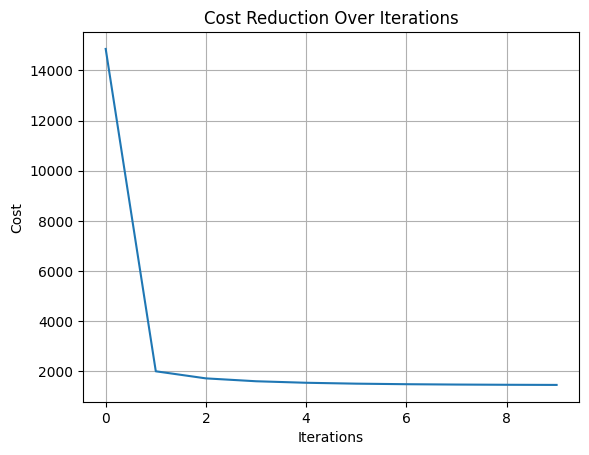

In [174]:
plt.plot(cost)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost Reduction Over Iterations")
plt.grid(True)
plt.show()

In [175]:
weight

array([  41.83583875, -203.34246741,  509.40182826,  325.09362937,
        -70.69864638, -119.30473492, -216.4339722 ,  144.33010646,
        376.41068199,  111.96847712])

In [176]:
bais

151.37277324768667

prediction on testing data

In [177]:
y_pred = prediction(X_test,weight,bais)

evaluation metrix

In [178]:
r2 = r2_score(y_test, y_pred)

In [179]:
print("R² Score:", r2)
print("MSE:", mean_squared_error(y_test, y_pred))

R² Score: 0.45889513159750384
MSE: 2866.85570465753


Regularization with multiple regression

In [180]:
def prediction_reg(x_data,w,b):
    n = x_data.shape[0]
    pred = np.zeros(n)

    for i in range(n):
        dat = np.sum(np.dot(x_data[i],w)) +b
        pred[i]=dat
    return pred

cost function 

In [181]:
def cost_model_reg(x_data, y_data, w, lamda):
    cost = 0
    m = x_data.shape[0]
    n = 2 * m
    for i in range(x_data.shape[0]):
        cos = (x_data[i] - y_data[i]) ** 2
        cost = cost + cos
    cost = cost / n

    reg = (lamda / (n)) * np.sum(w ** 2)
    cost = cost + reg

    return cost



gradient

In [ ]:
def gradient_reg(x_data,y_data,data):
    m = data.shape[1] # Change m to represent the number of features
    bi = 0
    wi = np.zeros(m)
    for i in range(len(x_data)): # Iterate over the number of samples
        diff = x_data[i]-y_data[i]
        for j in range(m): # Iterate over the number of features
            wi[j] = wi[j]+ diff * data[i][j]
            bi = bi + diff
    wi = wi/len(x_data) # Divide by the number of samples
    bi = bi/len(x_data) # Divide by the number of samples
    return wi,bi

In [185]:
def gradient_descent_reg(x_data, y_data, lr, itr, lamda):
    m = x_data.shape[1]  # number of features
    hist = []
    w = np.zeros(m)
    b = 0
    predict = np.zeros(x_data.shape[0])
    cost = []

    for i in range(itr):
        predict = prediction(x_data, w, b)
        wit, bis = gradient_reg(predict, y_data, x_data)

        # Add  regularization to the weight gradient
        wit = wit + (lamda / x_data.shape[0]) * w

        w = w - (lr * wit)
        b = b - (lr * bis)

        if i % 1000 == 0:
            c = cost_model_reg(predict, y_data, w, lamda)  # Include regularized cost
            cost.append(c)
            hist.append([w.copy(), b])
            print(f"weight : {w}  bias : {b}")

    return w, b, hist, cost, predict


In [186]:
weight_reg,bais_reg,w_b_reg,cost_reg,pred_reg =gradient_descent_reg(X_train,y_train,lr=0.1,itr =10000,lamda=0.1)

weight : [ 0.09304058  0.00546622  0.24922848  0.18593635  0.06568503  0.04504827
 -0.15582195  0.16392433  0.22427236  0.17608089]  bias : 153.73654390934846
weight : [ 43.25420452 -13.93509776 166.76110871 122.24023358  34.09268761
  19.68857037 -97.73140351  99.48848343 145.35857899  95.76663652]  bias : 152.7866243121209
weight : [  55.91525917  -42.62837357  263.64862424  188.33553886   27.79150977
    2.91191414 -144.535105    133.86066026  219.21643137  132.0072645 ]  bias : 152.29262877575954
weight : [  57.45129107  -72.4617562   325.83087109  227.59255115   10.95216119
  -21.4922179  -168.92587063  144.09529773  261.41374363  143.56475209]  bias : 152.0113569532167
weight : [  55.35217881  -98.94997934  368.81634776  252.78914688   -6.20526132
  -44.00876137 -182.78233664  145.88225372  288.38828642  144.70751253]  bias : 151.83783160452492
weight : [  52.4356881  -121.06162622  400.02923875  269.90198866  -20.74011719
  -62.21854254 -191.27316874  145.10722822  307.24066274 

In [191]:
weight_reg

array([  43.34228683, -180.69281468,  473.79577775,  305.34081665,
        -57.60286789, -103.22819792, -205.85211434,  141.67075899,
        352.98041435,  115.10397466])

In [192]:
bais_reg

151.505789738715

In [193]:
y_pred = prediction_reg(X_test,weight_reg,bais_reg)

In [195]:
r2 = r2_score(y_test, y_pred)
Mse = mean_squared_error(y_test, y_pred)

In [197]:
print("R² Score:", r2)
print("MSE:",Mse )

R² Score: 0.46045097858268524
MSE: 2858.6125912325674
